In [46]:
#Libraries to import
import pandas as pd
import numpy as np
import hvplot.pandas
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Bring in Bitcoin Data and Elon's Tweet Data

In [47]:
#Plotting Bitcoins Trajectory - 
#Skip the first Row of CSV file and drop the UNIX Time Stamp column and unnecessary Symbol column 
BTC_hour = pd.read_csv('data/gemini_BTCUSD_1hr.csv', skiprows=1).drop(columns=['Unix Timestamp','Symbol'])

#Bring in BTCUSD_day
BTC_day = pd.read_csv('data/gemini_BTCUSD_day.csv', skiprows=1).drop(columns=['Unix Timestamp','Symbol'])

#Convert Date to datetime
BTC_day['Date'] = pd.to_datetime(BTC_day['Date'],utc=True)
BTC_hour['Date'] = pd.to_datetime(BTC_hour['Date'],utc=True)


#Make Date index -> Clean up Data
BTC_day.set_index('Date', inplace=True)
BTC_hour.set_index('Date',inplace=True)

#Sort BTC Index
BTC_hour.sort_index(ascending=True,inplace=True)

BTC_day.head()
BTC_hour.head()

Open    High     Low   Close    Volume
Date                                                               
2015-10-08 13:00:00+00:00    0.00  245.00    0.00  245.00  0.606654
2015-10-08 14:00:00+00:00  245.00  245.00  244.50  245.00  4.453649
2015-10-08 15:00:00+00:00  245.00  245.00  244.92  244.92  3.016926
2015-10-08 16:00:00+00:00  244.92  244.92  244.25  244.25  3.895252
2015-10-08 17:00:00+00:00  244.25  244.99  244.02  244.99  3.920632

In [48]:
#Bring in ALL of Elon Musks Tweets
tweets_elonmusk_all = pd.read_csv('Data/tweets_elonmusk_all_CLEAN.csv')
#Bring in and group Elon Musk Tweets about Crypto/Bitcoin
tweets_elonmusk_crypto = pd.read_csv('Data/tweets_elonmusk_crypto_CLEAN.csv')

#Convert tweet_date to datetime
tweets_elonmusk_all['tweet_date'] = pd.to_datetime(tweets_elonmusk_all['tweet_date'],utc=True)
tweets_elonmusk_crypto['tweet_date'] = pd.to_datetime(tweets_elonmusk_crypto['tweet_date'],utc=True)

#Round the tweets to the nearest hour
tweets_elonmusk_all['tweet_date'] = tweets_elonmusk_all['tweet_date'].dt.round('60min')
tweets_elonmusk_crypto['tweet_date'] = tweets_elonmusk_crypto['tweet_date'].dt.round('60min')


tweets_elonmusk_all.head()

twitter_username twitter_account                tweet_date  \
0       Elon Mus00      @elonmus00 2021-03-13 00:00:00+00:00   
1       Elon Mus00      @elonmus00 2021-03-13 00:00:00+00:00   
2       Elon Mus00      @elonmus00 2021-03-12 23:00:00+00:00   
3       Elon Mus00      @elonmus00 2021-03-12 19:00:00+00:00   
4       Elon Mus00      @elonmus00 2021-03-12 19:00:00+00:00   

                                       tweet_content  tweet_reply_count  \
0  replying to \n@ashleevancefor sure wise for el...               2500   
1  fsd beta has now been expanded to ~2000 owners...               1300   
2  replying to \n@pflodin\n and \n@doctor00arlabs...                 87   
3              both do mining & use bloc00s & chains               2900   
4  btc (bitcoin) is an anagram of\ntbc(the boring...              11700   

   tweet_retweet_count  tweet_like_count  
0                 1300               800  
1                 1700             19500  
2                   67              1400  
3                 4300             96400  
4                19600            234200

In [49]:
#Make tweet_date the index and sort index
EMT = tweets_elonmusk_crypto.set_index('tweet_date').sort_index(ascending=True) #EMT - Elon Musk Tweets with the tweet_date set as the index
tweets_elonmusk_crypto.sort_index(ascending=False,inplace=True)

# Plot Elon's Crypto Tweet Profile

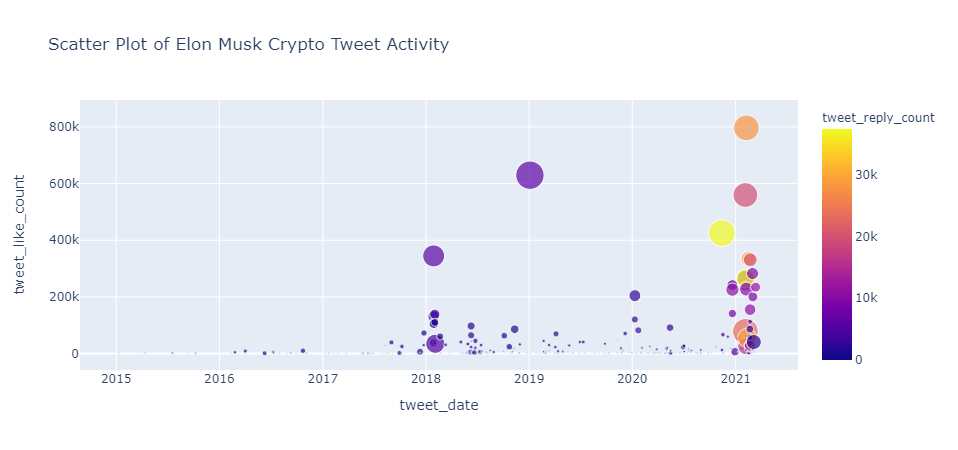

<Figure size 432x288 with 0 Axes>

In [50]:
#Plot the likes by day - scatter plot
fig = plt.figure()
fig = px.scatter(tweets_elonmusk_crypto,x='tweet_date',y='tweet_like_count',size='tweet_retweet_count', color='tweet_reply_count', title = 'Scatter Plot of Elon Musk Crypto Tweet Activity')
fig.write_image('images/Scatter_Plot_Tweet_Activity.png')
fig.show()

In [51]:
#Filter out the hours when Elon tweeted
filtered_BTC = EMT.merge(BTC_hour, left_on='tweet_date', right_index=True)
filtered_BTC.head()

twitter_username twitter_account  \
tweet_date                                                   
2015-10-09 05:00:00+00:00        Elon Musk       @elonmusk   
2016-02-11 07:00:00+00:00        Elon Musk       @elonmusk   
2016-02-24 17:00:00+00:00       Elon Mus00      @elonmus00   
2016-03-31 21:00:00+00:00       Elon Mus00      @elonmus00   
2016-04-01 18:00:00+00:00       Elon Mus00      @elonmus00   

                                                               tweet_content  \
tweet_date                                                                     
2015-10-09 05:00:00+00:00  peak temp increases due to climate changethe s...   
2016-02-11 07:00:00+00:00  replying to \n@garethseneque@garethseneque\n g...   
2016-02-24 17:00:00+00:00  worth reposting the wait but why piece on ai w...   
2016-03-31 21:00:00+00:00  replying to \n@elonmus00model 3 orders00 wheth...   
2016-04-01 18:00:00+00:00  definitely going to need to rethin00 productio...   

                           tweet_reply_count  tweet_retweet_count  \
tweet_date                                                          
2015-10-09 05:00:00+00:00                 86                  784   
2016-02-11 07:00:00+00:00                  9                   21   
2016-02-24 17:00:00+00:00                213                 2400   
2016-03-31 21:00:00+00:00                186                  605   
2016-04-01 18:00:00+00:00                717                 3100   

                           tweet_like_count    Open    High     Low   Close  \
tweet_date                                                                    
2015-10-09 05:00:00+00:00               981  243.60  243.60  243.60  243.60   
2016-02-11 07:00:00+00:00               162  378.62  378.74  378.50  378.50   
2016-02-24 17:00:00+00:00              4300  421.85  422.85  421.85  422.85   
2016-03-31 21:00:00+00:00              1500  416.60  416.94  416.60  416.93   
2016-04-01 18:00:00+00:00              9100  416.00  416.08  416.00  416.08   

                              Volume  
tweet_date                            
2015-10-09 05:00:00+00:00   0.000000  
2016-02-11 07:00:00+00:00  10.801489  
2016-02-24 17:00:00+00:00  45.127719  
2016-03-31 21:00:00+00:00   1.297414  
2016-04-01 18:00:00+00:00  31.921884

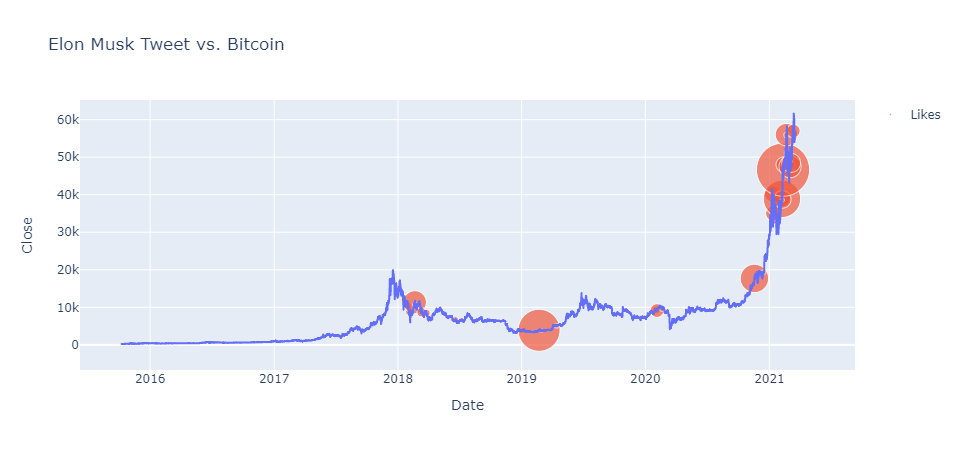

In [52]:
#Plot the likes size over the BTC value
#Plot BTC
fig = px.line(BTC_hour, x=BTC_hour.index, y='Close', title='Elon Musk Tweet vs. Bitcoin')

#Add a scatter plot, but the x and y corrdinates of likes in bubbles
fig.add_trace(go.Scatter(x=filtered_BTC.index,y=filtered_BTC['Close'], mode='markers',name='Likes',marker=dict(size=tweets_elonmusk_crypto['tweet_like_count']/15000)))

#Save the plot
fig.write_image('images/Bitcoin_Data.png')

#Show plot
fig.show()

# Bitcoin Analysis

In [53]:
#Get daily retruns of BTC
daily_returns = BTC_day.pct_change().dropna()
daily_returns['Volume'] = daily_returns[daily_returns['Volume']<1000]
daily_returns.head()

Open      High       Low     Close    Volume
Date                                                                       
2021-03-14 04:00:00+00:00  0.016444  0.015509  0.076007  0.081546  0.016444
2021-03-13 04:00:00+00:00 -0.075771  0.004621 -0.041966  0.016444 -0.075771
2021-03-12 04:00:00+00:00  0.007156 -0.061921 -0.021933 -0.075771  0.007156
2021-03-11 04:00:00+00:00 -0.019960  0.002774 -0.013956  0.007156 -0.019960
2021-03-10 04:00:00+00:00 -0.044764 -0.012388 -0.022710 -0.019960 -0.044764

In [54]:
#Plot out daily returns
daily_returns['Close'].hvplot(width=1400,height=600, title='Bitcoin Daily Returns')

:Curve   [Date]   (Close)

In [55]:
#Group tweets day by day
tweets_elonmusk_crypto_daily = tweets_elonmusk_crypto.set_index('tweet_date').groupby(pd.Grouper(freq='D')).mean().dropna()
tweets_elonmusk_crypto_daily.head()

tweet_reply_count  tweet_retweet_count  \
tweet_date                                                          
2015-01-10 00:00:00+00:00              421.0                200.0   
2015-03-31 00:00:00+00:00              496.0                100.0   
2015-04-11 00:00:00+00:00               59.0                117.0   
2015-04-13 00:00:00+00:00              265.0                100.0   
2015-07-18 00:00:00+00:00              219.0               1100.0   

                           tweet_like_count  
tweet_date                                   
2015-01-10 00:00:00+00:00            2600.0  
2015-03-31 00:00:00+00:00            1900.0  
2015-04-11 00:00:00+00:00             517.0  
2015-04-13 00:00:00+00:00            2300.0  
2015-07-18 00:00:00+00:00            2100.0

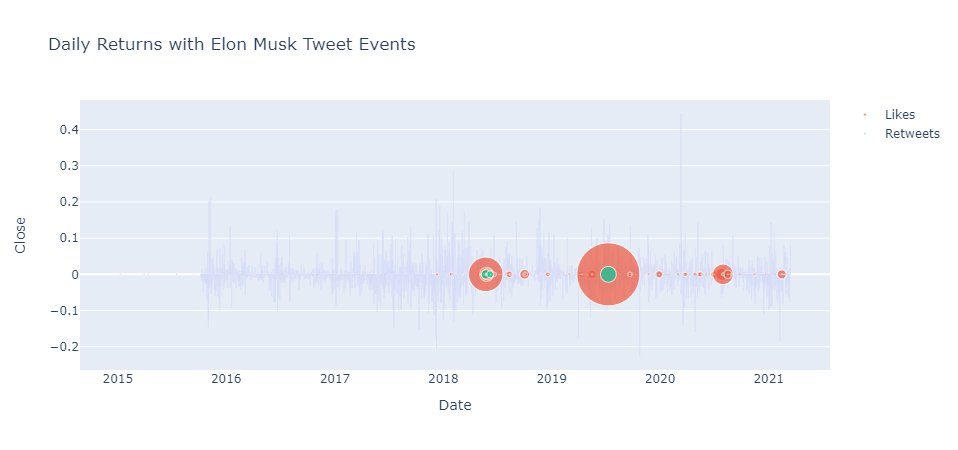

In [56]:
#Plot out Elon Musk tweet with daily returns - See if point of tweets correlate with High Daily returns

#Plot the likes size over the BTC value

#Plot BTC
fig = px.bar(daily_returns, x=daily_returns.index, y='Close', title='Daily Returns with Elon Musk Tweet Events')

#Add a scatter plot, but the x and y corrdinates of likes in bubbles
fig.add_trace(go.Scatter(x=tweets_elonmusk_crypto_daily.index,y=tweets_elonmusk_crypto_daily['tweet_like_count']*0, mode='markers',name='Likes', marker=dict(size=tweets_elonmusk_crypto['tweet_like_count']/10000)))

#Add a scatter plot, but the x and y corrdinates of retweet in bubbles
fig.add_trace(go.Scatter(x=tweets_elonmusk_crypto_daily.index,y=tweets_elonmusk_crypto_daily['tweet_retweet_count']*0, mode='markers',name='Retweets', marker=dict(size=tweets_elonmusk_crypto['tweet_retweet_count']/10000)))

#Save image
fig.write_image('images/daily_returns_with_elons_tweet_events.png')

#Show plot
fig.show()

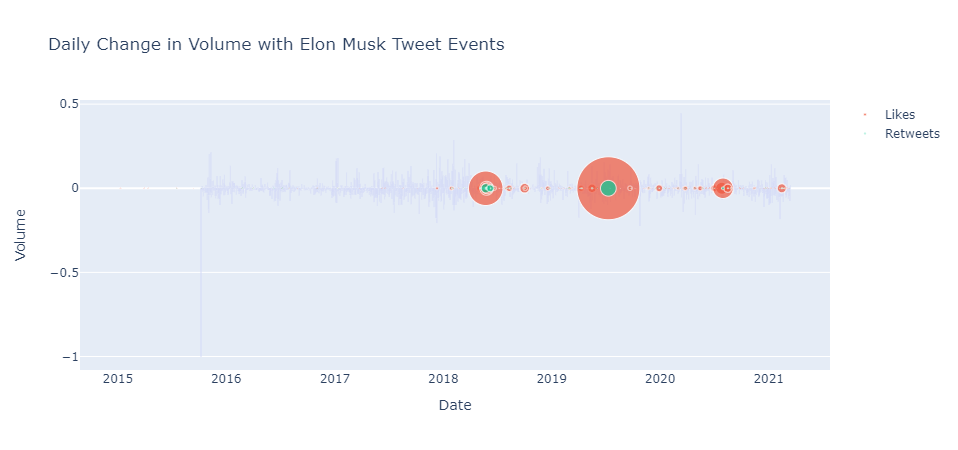

In [57]:
#Plot out Elon Musk tweet with daily returns - See if point of tweets correlate with High Daily returns

#Plot the likes size over the BTC value

#Plot BTC
fig = px.bar(daily_returns, x=daily_returns.index, y='Volume', title='Daily Change in Volume with Elon Musk Tweet Events')

#Add a scatter plot, but the x and y corrdinates of likes in bubbles
fig.add_trace(go.Scatter(x=tweets_elonmusk_crypto_daily.index,y=tweets_elonmusk_crypto_daily['tweet_like_count']*0, mode='markers',name='Likes', marker=dict(size=tweets_elonmusk_crypto['tweet_like_count']/10000)))

#Add a scatter plot, but the x and y corrdinates of retweet in bubbles
fig.add_trace(go.Scatter(x=tweets_elonmusk_crypto_daily.index,y=tweets_elonmusk_crypto_daily['tweet_retweet_count']*0, mode='markers',name='Retweets', marker=dict(size=tweets_elonmusk_crypto['tweet_retweet_count']/10000)))

#Save image
fig.write_image('images/daily_volume_with_elons_tweet_events.png')

#Show plot
fig.show()

# Elon Musk's Tweets Correlated with Bitcoin's Price Action

In [58]:
#Normalize Date portion of daily returns for daily_returns as daily dataframe
daily=daily_returns
daily.index = daily_returns.index.normalize()


#Combine daily_returns with Elon Musk Tweets Daily
daily_returns_and_elon_tweets = pd.concat([daily,tweets_elonmusk_crypto_daily],axis=1,join='inner')
daily_returns_and_elon_tweets.drop(columns=['Open','High','Low','Close','tweet_reply_count','tweet_retweet_count'],inplace=True)

In [59]:
#Correlate the two findings
correlation = daily_returns_and_elon_tweets.corr()
correlation

Volume  tweet_like_count
Volume            1.000000          0.045157
tweet_like_count  0.045157          1.000000

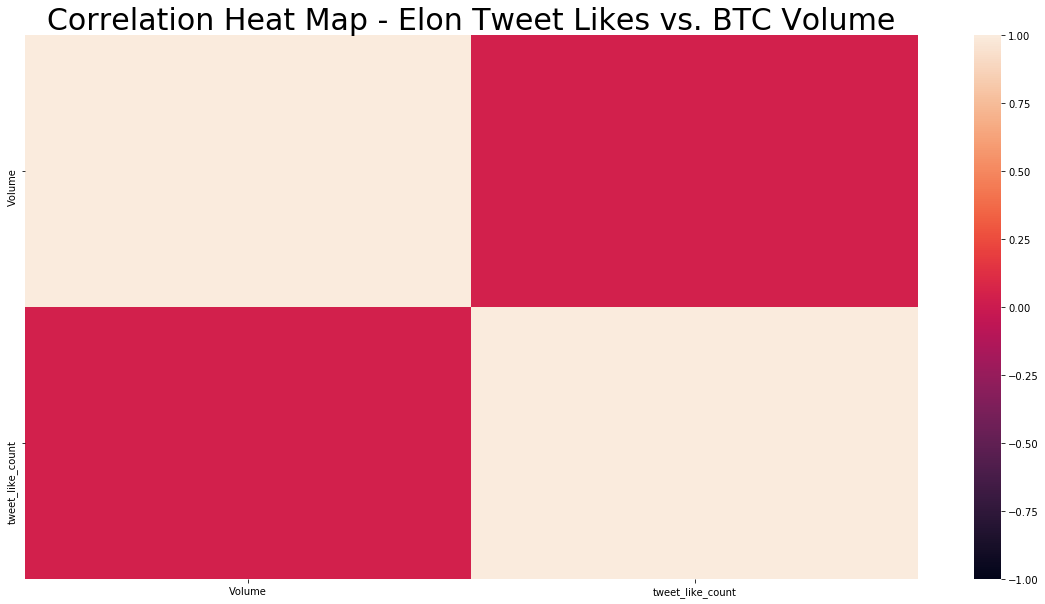

In [60]:
#Plot Correlation Plot
fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('Correlation Heat Map - Elon Tweet Likes vs. BTC Volume',fontsize=30)
sns.heatmap(correlation,vmin=-1,vmax=1,ax=ax)#.title('Corr')
fig.savefig('images/Heatmap_Volume.png')

In [61]:
#Group Elon's Tweet like count by day
elon_daily_tweet_count = tweets_elonmusk_all.set_index('tweet_date').groupby(pd.Grouper(freq='D')).sum()

#Drop all zeros
elon_daily_tweet_count.replace(0,np.nan,inplace=True)
elon_daily_tweet_count.dropna(inplace=True)
elon_daily_tweet_count.head()

tweet_reply_count  tweet_retweet_count  \
tweet_date                                                          
2015-01-05 00:00:00+00:00              456.0               4230.0   
2015-01-06 00:00:00+00:00              392.0               2245.0   
2015-01-10 00:00:00+00:00             2257.0              13848.0   
2015-01-15 00:00:00+00:00              763.0               6410.0   
2015-01-16 00:00:00+00:00              730.0               7874.0   

                           tweet_like_count  
tweet_date                                   
2015-01-05 00:00:00+00:00            4097.0  
2015-01-06 00:00:00+00:00            1656.0  
2015-01-10 00:00:00+00:00           13871.0  
2015-01-15 00:00:00+00:00            7081.0  
2015-01-16 00:00:00+00:00            8986.0

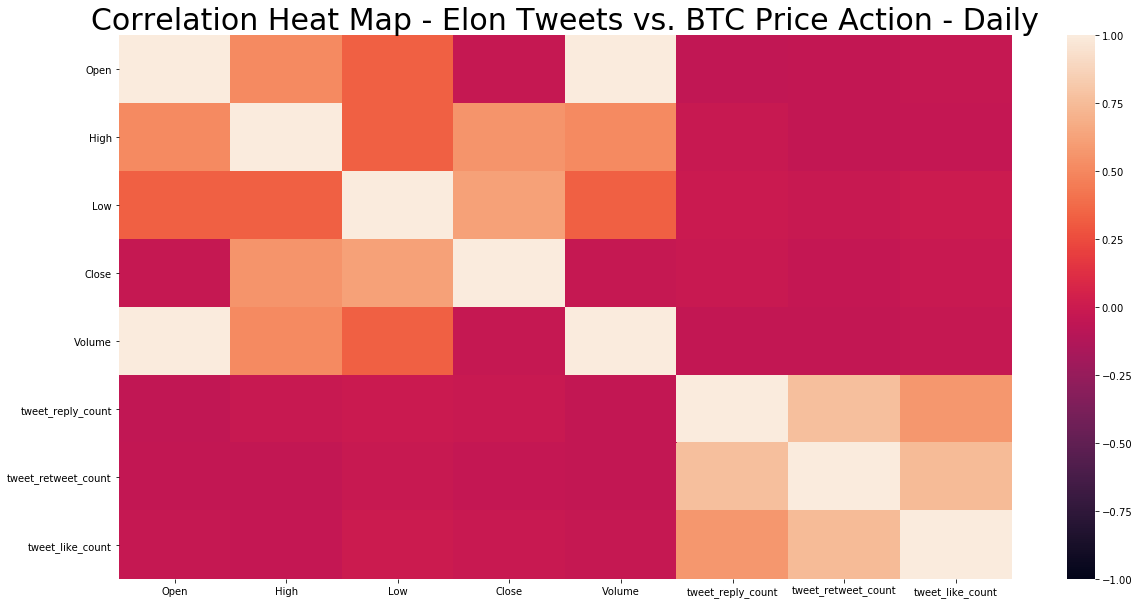

In [62]:
#Normalize Date portion of daily returns for daily_returns as daily dataframe
daily=daily_returns
daily.index = daily_returns.index.normalize()

#Combine daily_returns with Elon Musk Tweets Daily
daily_returns_and_elon_tweets = pd.concat([daily,elon_daily_tweet_count],axis=1,join='inner')
daily_returns_and_elon_tweets #.drop(columns=['Open','High','Low','Close','tweet_reply_count','tweet_retweet_count'],inplace=True)

#Correlate the two findings
correlation = daily_returns_and_elon_tweets.corr()
correlation

#Plot Correlation Plot
fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('Correlation Heat Map - Elon Tweets vs. BTC Price Action - Daily',fontsize=30)
sns.heatmap(correlation,vmin=-1,vmax=1,ax=ax)
fig.savefig('images/Heatmap_Daily.png')

In [63]:
#hourly returns
hourly_returns = BTC_hour.pct_change().dropna()
hourly_returns['Close'].hvplot(width=1400,height=600,title='Hourly Returns on Bitcoin')

:Curve   [Date]   (Close)

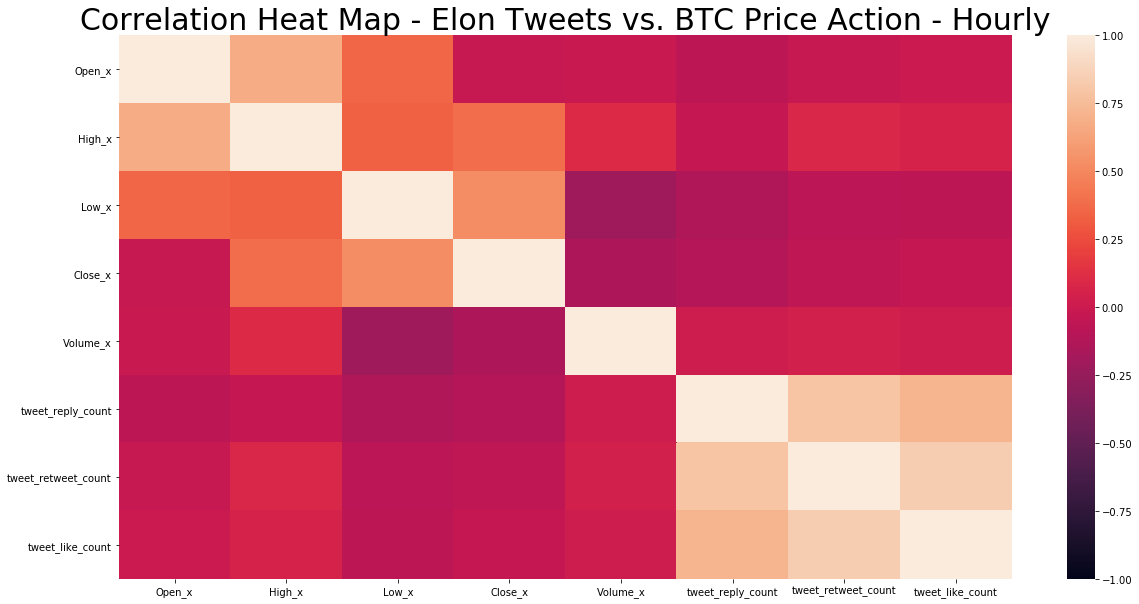

In [64]:
#Normalize Date portion of daily returns for hourly_returns as hourly dataframe
hourly=hourly_returns

#Combine daily_returns with Elon Musk Tweets Hourly
# = filtered_BTC#pd.concat([hourly,filtered_BTC],axis=1,join='inner')
hourly_returns_and_elon_tweets = hourly.merge(filtered_BTC, left_on='Date', right_index=True)
hourly_returns_and_elon_tweets.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','twitter_username','twitter_account','tweet_content'], inplace=True)
hourly_correlation = hourly_returns_and_elon_tweets.corr()

#Plot Correlation Plot
fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('Correlation Heat Map - Elon Tweets vs. BTC Price Action - Hourly',fontsize=30)
sns.heatmap(hourly_correlation,vmin=-1,vmax=1,ax=ax)
fig.savefig('images/Heatmap_Hourly.png')

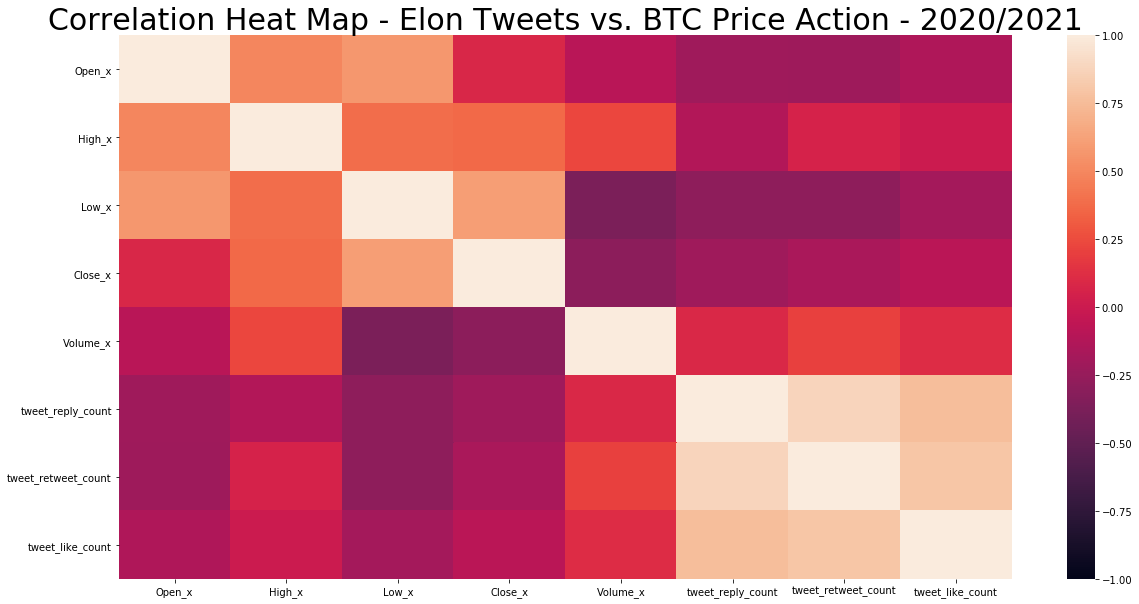

In [65]:
#Compare Elon's tweets for 2020 vs. 2021

#Normalize Date portion of daily returns for hourly_returns as hourly dataframe
hourly=hourly_returns

#Combine daily_returns with Elon Musk Tweets Hourly
hourly_returns_and_elon_tweets = hourly.merge(filtered_BTC, left_on='Date', right_index=True)
hourly_returns_and_elon_tweets.drop(columns=['Open_y','High_y','Low_y','Close_y','Volume_y','twitter_username','twitter_account','tweet_content'], inplace=True)

#Filter out elon's tweets for only 2020-2021
hourly_returns_and_elon_tweets = hourly_returns_and_elon_tweets.loc['2020':'2021']

#Create the correlation
hourly_correlation = hourly_returns_and_elon_tweets.corr()

#Plot Correlation Plot
fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('Correlation Heat Map - Elon Tweets vs. BTC Price Action - 2020/2021',fontsize=30)
sns.heatmap(hourly_correlation,vmin=-1,vmax=1,ax=ax)
fig.savefig('images/Heatmap_2020_2021.png')